In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
train = pd.read_csv('data/bank.csv')

In [3]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
train['job'].replace(['unknown'],train['job'].mode(),inplace=True)
train['marital'].replace(['unknown'],train['marital'].mode(),inplace=True)
train['education'].replace(['unknown'],train['education'].mode(),inplace=True)
train['default'].replace(['unknown'],train['default'].mode(),inplace=True)
train['housing'].replace(['unknown'],train['housing'].mode(),inplace=True)


In [5]:
train['y'].replace(to_replace = 'no', value = 0, inplace = True)
train['y'].replace(to_replace = 'yes', value = 1, inplace = True)
train['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [6]:
def missing_data(data):
    total = data.isin(['unknown']).sum()
    #count计算总行数，计算0和1个数；sum计算所以0和1的加和
    percent = (data.isin(['unknown']).sum()/data.isin(['unknown']).count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['types'] = types
    return(np.transpose(tt))
missing_data(train)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Total,0,0,0,0,0,0,990,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,2.403613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
types,int64,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,int64


In [7]:
train['job'].replace(['unknown'],train['job'].mode(),inplace=True)
train['marital'].replace(['unknown'],train['marital'].mode(),inplace=True)
train['education'].replace(['unknown'],train['education'].mode(),inplace=True)
train['default'].replace(['unknown'],train['default'].mode(),inplace=True)
train['housing'].replace(['unknown'],train['housing'].mode(),inplace=True)
train['loan'].replace(['unknown'],train['loan'].mode(),inplace=True)

In [8]:
missing_data(train)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
types,int64,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,int64


In [9]:
train.drop('default',inplace=True,axis=1)

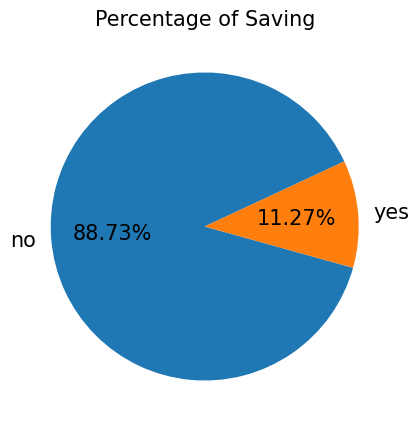

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
labels ="no", "yes"
count = train["y"].value_counts()
textprops = {"fontsize":15}

plt.pie(count,  autopct='%1.2f%%', labels=labels,  startangle=25, textprops =textprops)

plt.title("Percentage of Saving", fontsize=15)
plt.show()

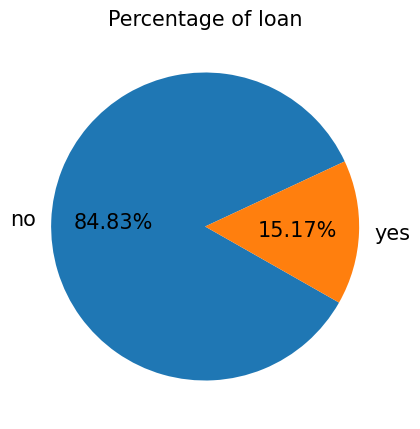

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
labels ="no", "yes"
count = train["loan"].value_counts()
textprops = {"fontsize":15}

plt.pie(count,  autopct='%1.2f%%', labels=labels,  startangle=25, textprops =textprops)

plt.title("Percentage of loan", fontsize=15)
plt.show()

# sale的影响因素

E:\Users\Joe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\Joe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


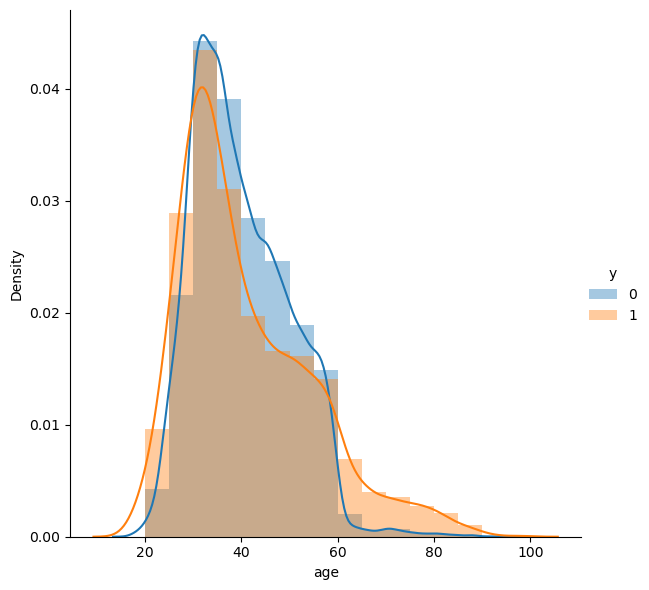

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fg = sns.FacetGrid(data=train,height=6,hue='y')
fg = (fg.map(sns.distplot,'age',bins=[20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]).add_legend())

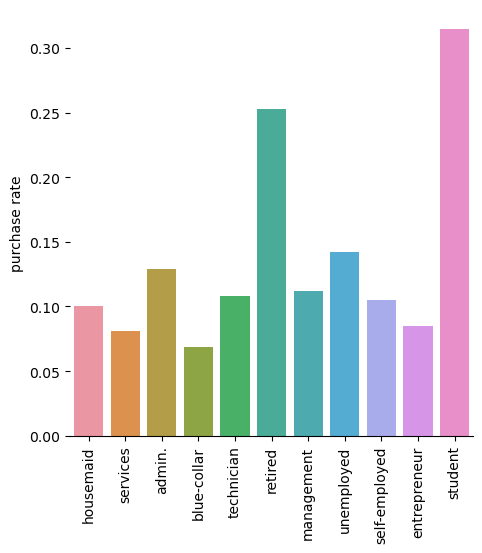

In [13]:
fg=sns.catplot(data=train,x='job',kind='bar',y='y',ci=None)
fg=(fg.set_xticklabels(rotation=90)
    .set_axis_labels('','purchase rate')
    .despine(left=True))

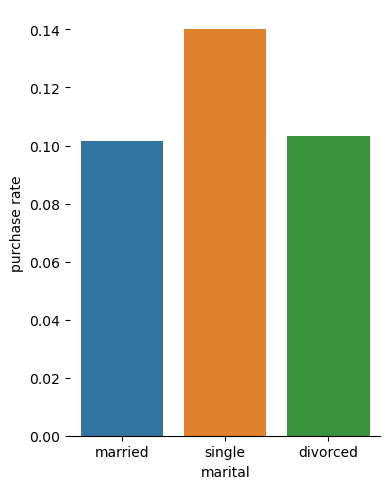

In [14]:
fg=sns.catplot(data=train,x='marital',kind='bar',y='y',ci=None,aspect=.8)
fg=(fg.set_axis_labels('marital','purchase rate')
    .despine(left=True))

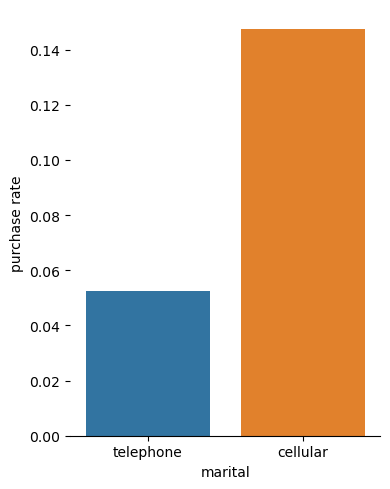

In [15]:
fg=sns.catplot(data=train,x='contact',kind='bar',y='y',ci=None,aspect=.8)
fg=(fg.set_axis_labels('marital','purchase rate')
    .despine(left=True))

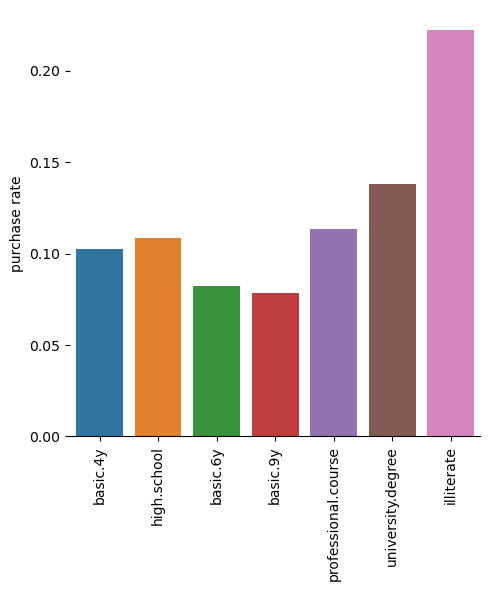

In [16]:
fg=sns.catplot(data=train,x='education',kind='bar',y='y',ci=None)
fg=(fg.set_xticklabels(rotation=90)
    .set_axis_labels('','purchase rate')
    .despine(left=True))

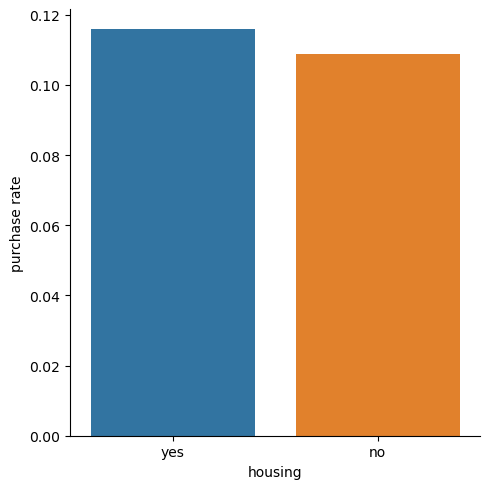

In [17]:
fg=sns.catplot(data=train,x='housing',kind='bar',y='y',ci=None,order=['yes','no'])
fg.set_axis_labels("housing",'purchase rate')

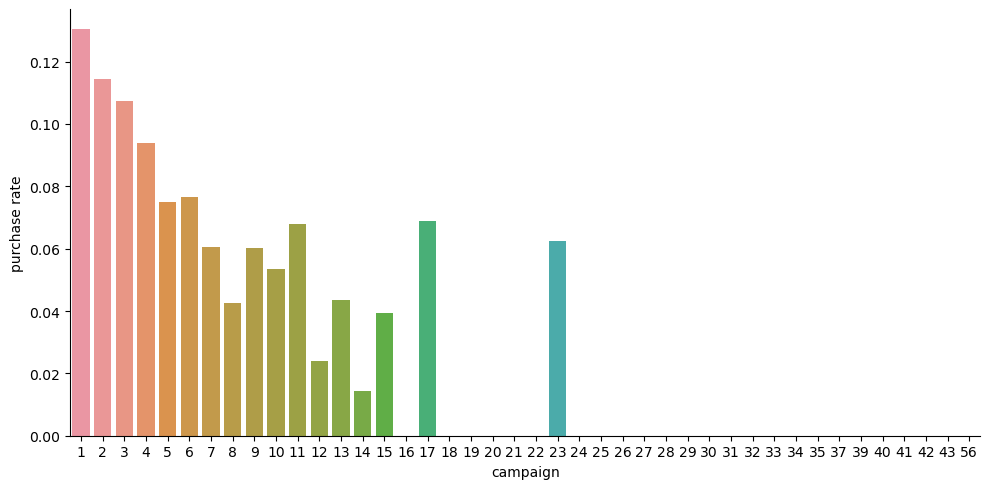

In [18]:
fg=sns.catplot(data=train,x='campaign',kind='bar',y='y',ci=None,aspect=2)
fg.set_axis_labels("campaign",'purchase rate')

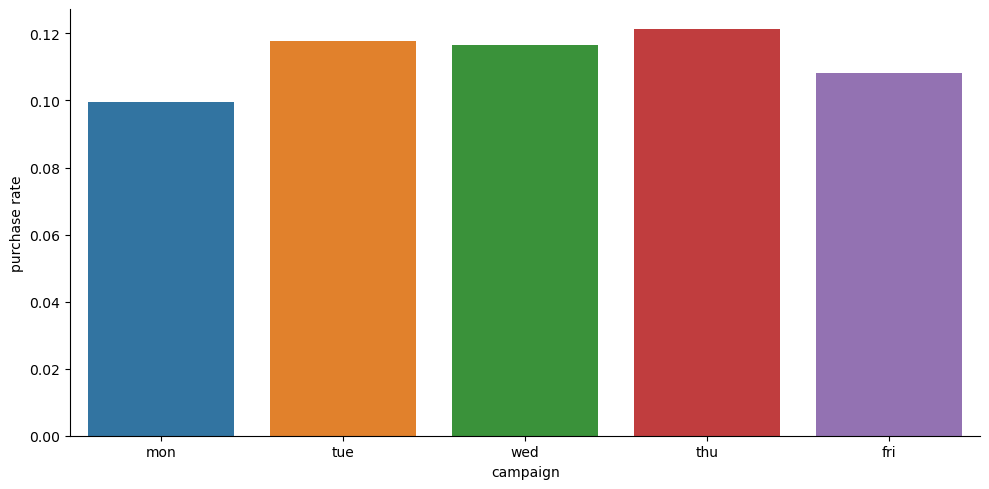

In [19]:
fg=sns.catplot(data=train,x='day_of_week',kind='bar',y='y',ci=None,aspect=2)
fg.set_axis_labels("campaign",'purchase rate')

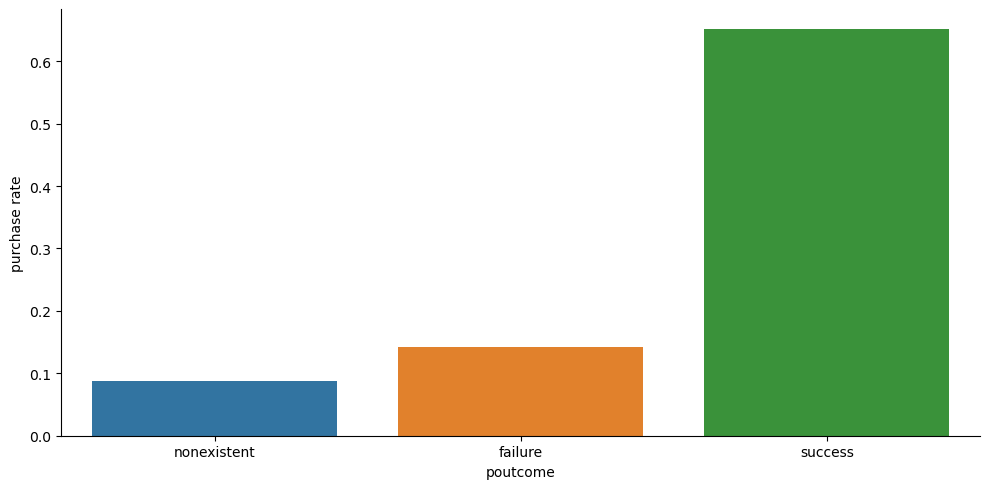

In [20]:
fg=sns.catplot(data=train,x='poutcome',kind='bar',y='y',ci=None,aspect=2)
fg.set_axis_labels("poutcome",'purchase rate')

E:\Users\Joe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\Joe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


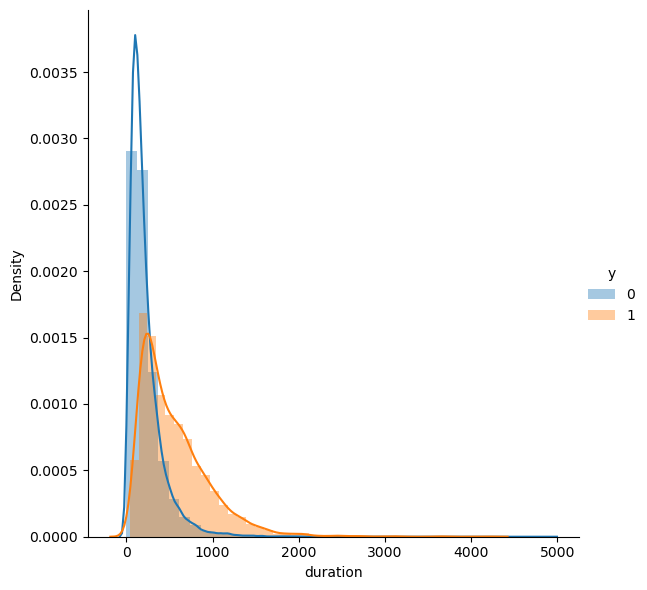

In [21]:
fg = sns.FacetGrid(data=train,height=6,hue='y')
fg = (fg.map(sns.distplot,'duration',bins=40) .add_legend())

<AxesSubplot:xlabel='y', ylabel='duration'>

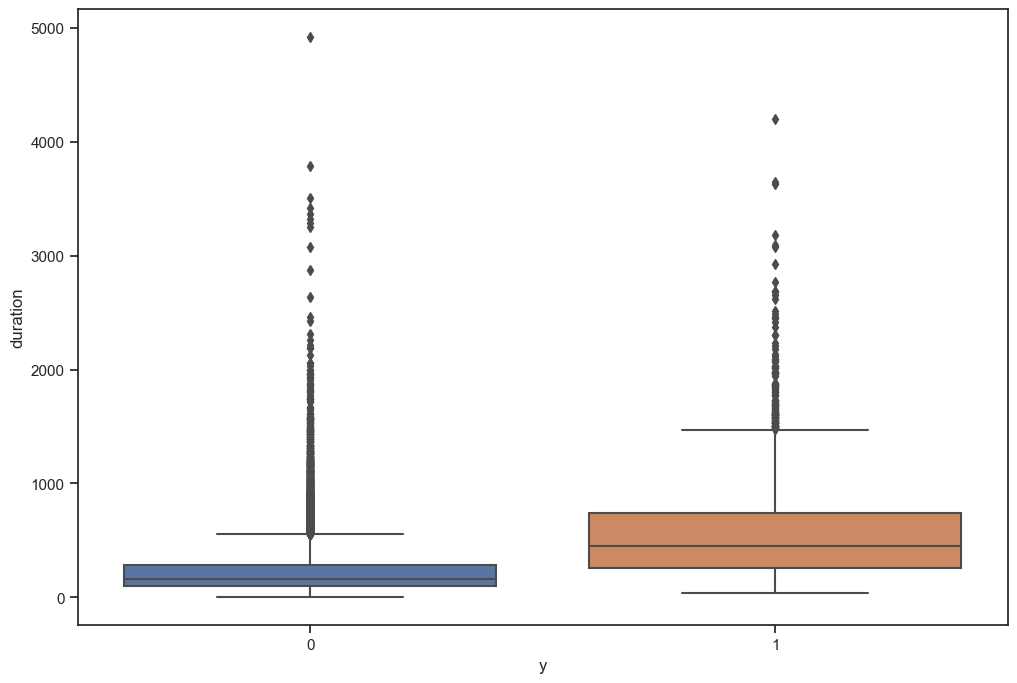

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "y", y = "duration", data = train) 

In [23]:
train.drop('day_of_week',inplace=True,axis=1)
train.drop('housing',inplace=True,axis=1)

In [24]:
train.drop('emp.var.rate',inplace=True,axis=1)
train.drop('nr.employed',inplace=True,axis=1)

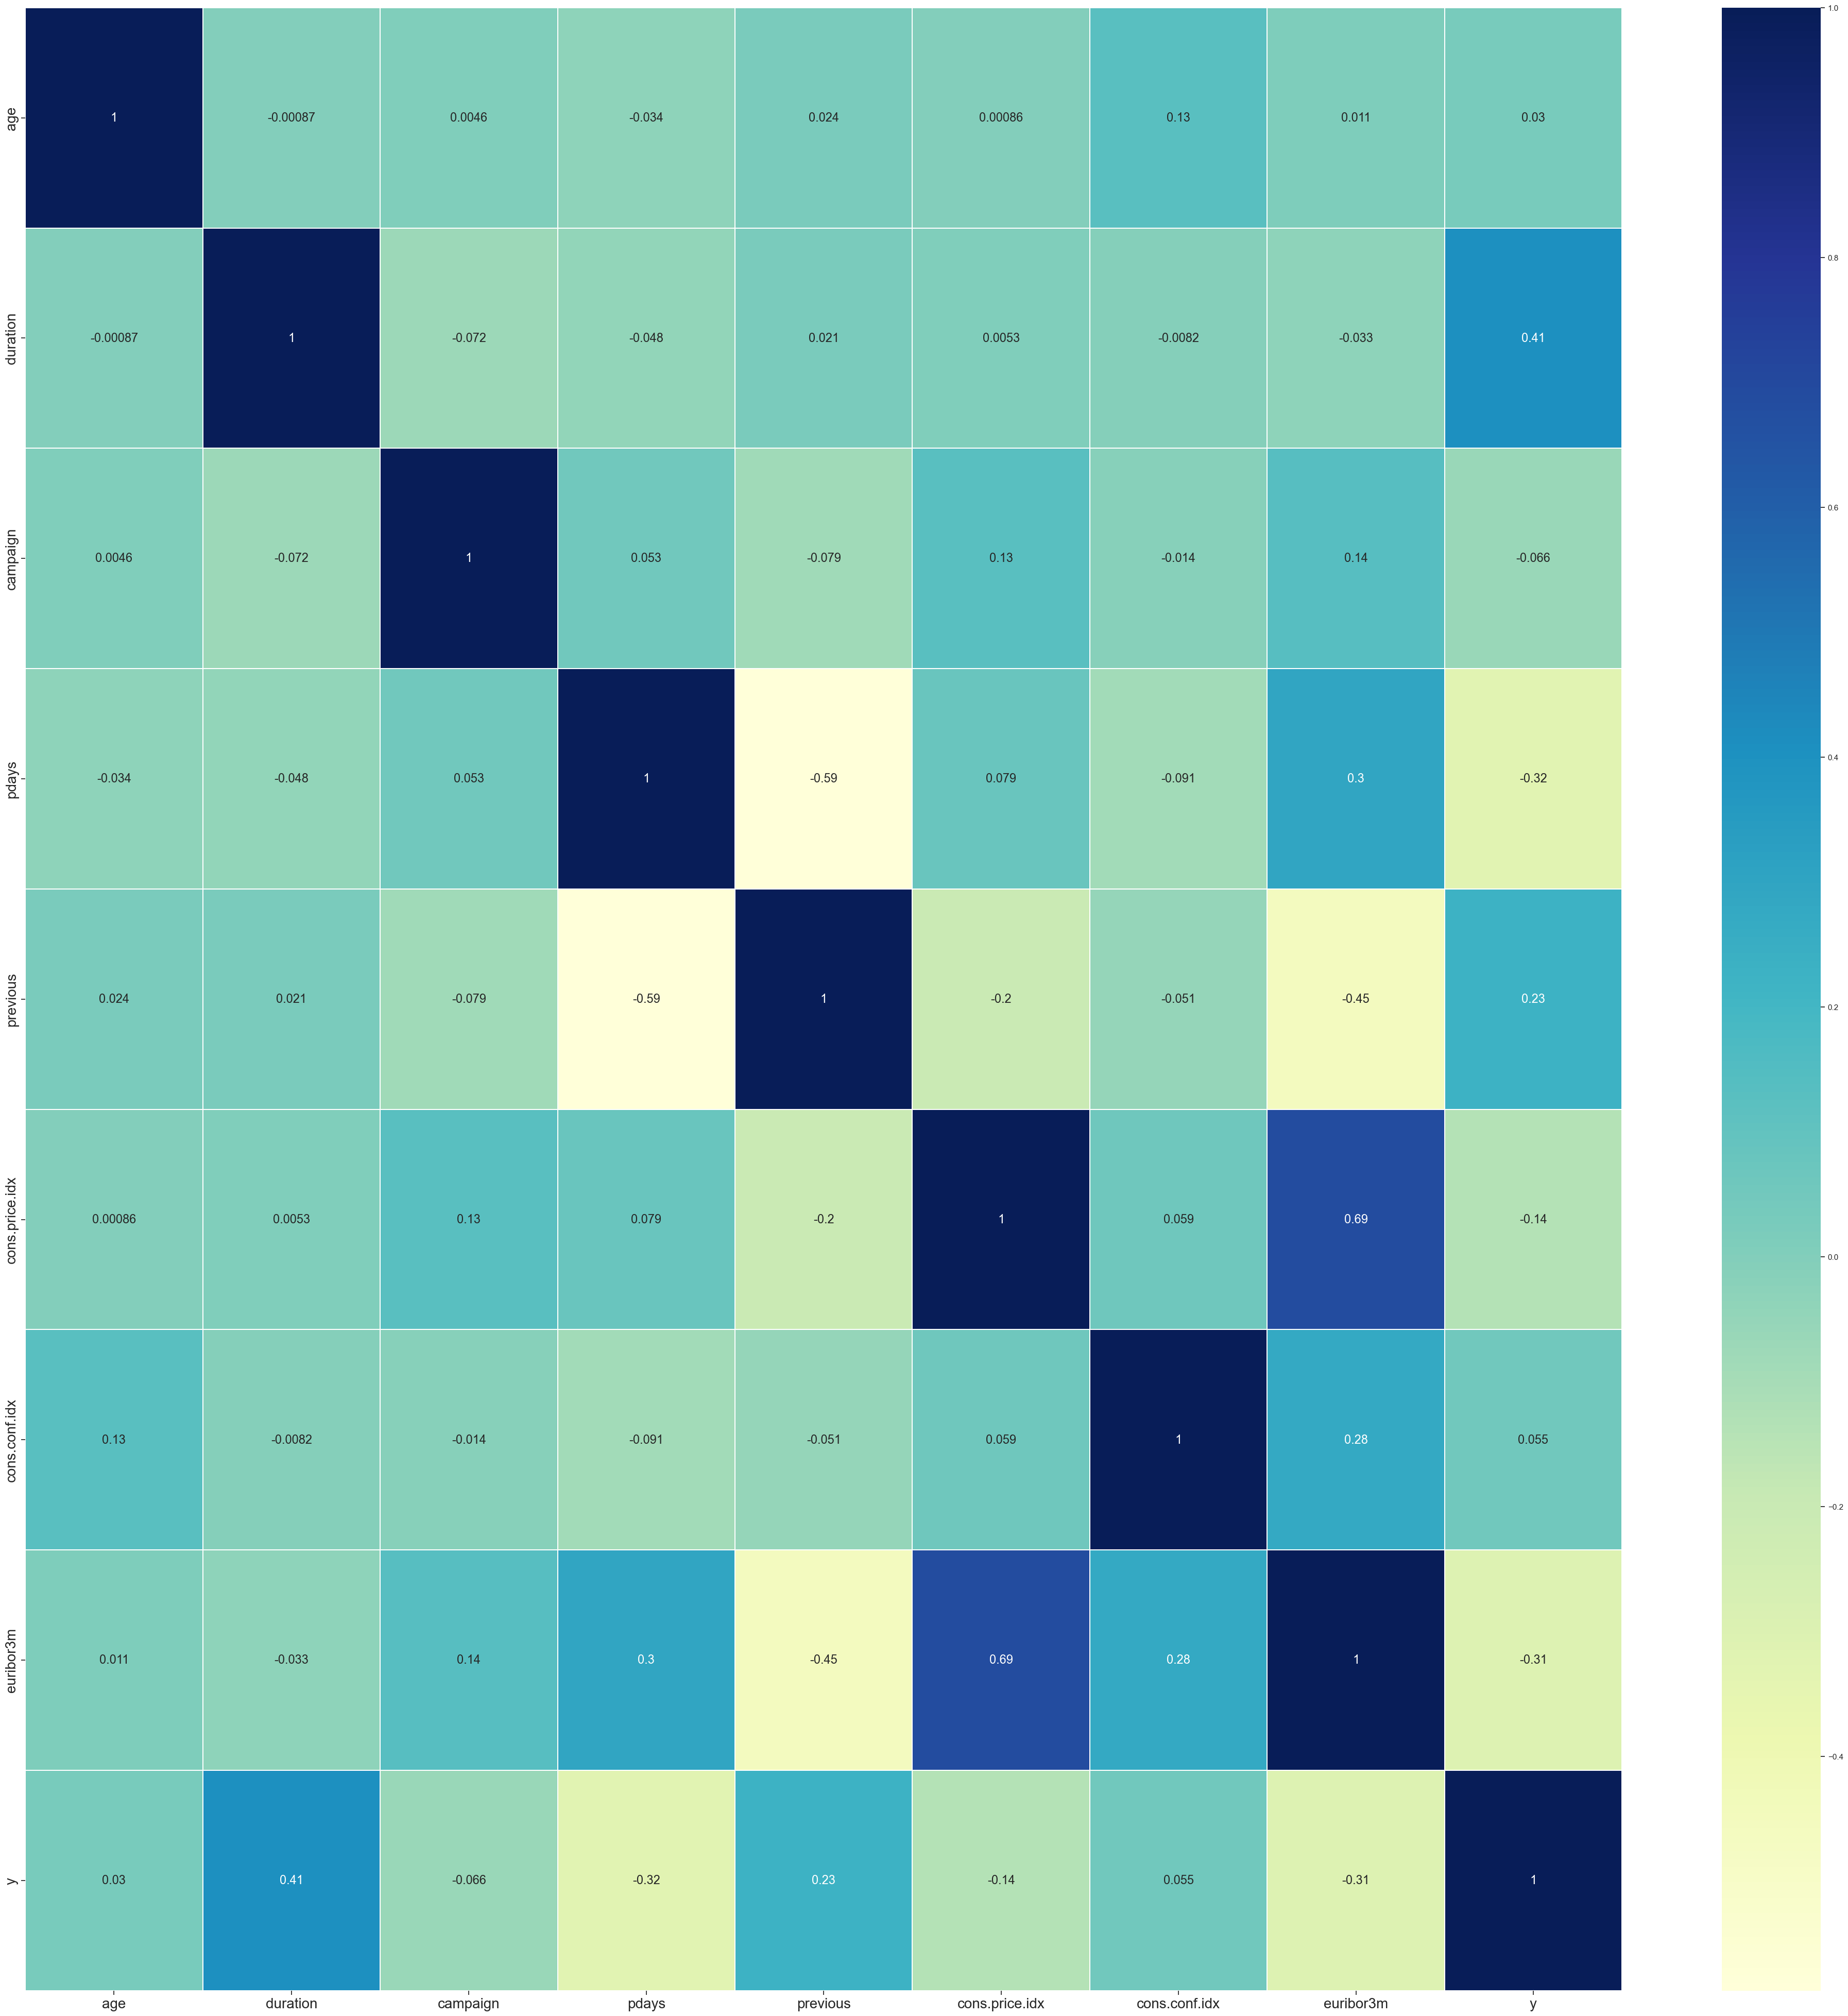

In [25]:
corr = train.corr()
plt.figure(figsize = (50, 50))
# annot_kws: 标注字体大小
ax = sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidth = 1.2, cmap = 'YlGnBu', annot = True, annot_kws={"fontsize":17})
# 增大x轴标签的大小
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 20)
# 增大y轴标签的大小
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 20)
plt.show()

In [26]:
train=pd.get_dummies(train,drop_first = True)

In [27]:
train.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,93.994,-36.4,4.857,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [28]:
feature_cols = [column for column in train if column != 'y']
feature_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_nonexistent',
 'poutcome_success']

<AxesSubplot:>

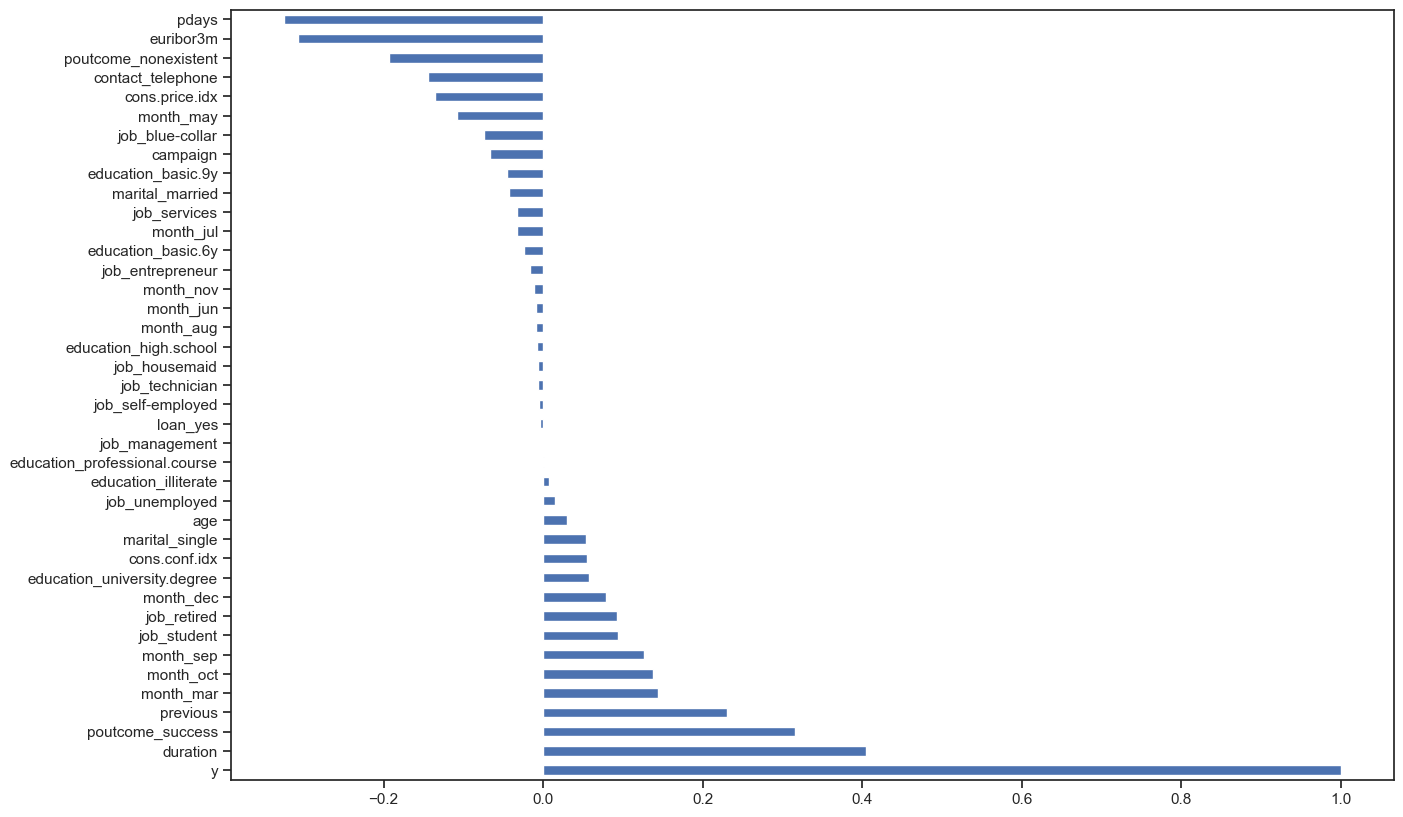

In [29]:
from sklearn import preprocessing
train['y'] = preprocessing.LabelEncoder().fit_transform(train['y'])
plt.figure(figsize=(15,10))
corr = train.corr()
train.corr()['y'].sort_values(ascending = False).plot(kind='barh')

In [30]:
train_data = train.copy()
train_data.drop('y',inplace=True,axis=1)

# 随机生成训练集和测试集
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(train_data,train['y'],test_size = 0.25,random_state = 1, stratify = train['y'])

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# 正则化
LR=LogisticRegression(penalty = 'l2',solver='saga')
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

E:\Users\Joe\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9061215240684989

In [32]:
x_pre_test=LR.predict(X_test)
x_pre_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test) 
y_pred_prob

array([[0.95901213, 0.04098787],
       [0.91865992, 0.08134008],
       [0.90533523, 0.09466477],
       ...,
       [0.95533764, 0.04466236],
       [0.73864622, 0.26135378],
       [0.86711957, 0.13288043]])

In [34]:
log_odds = LR.coef_[0]
a = pd.DataFrame.from_dict(dict(zip(train_data.columns,log_odds)),orient='index')
a

,0
age,0.007156
duration,0.003864
campaign,-0.007052
pdays,-0.002910
previous,0.001672
cons.price.idx,-0.004844
cons.conf.idx,0.010802
euribor3m,-0.028034
job_blue-collar,-0.001870
job_entrepreneur,-0.000215


In [35]:
test_accuracy = LR.score(X_test, y_test)
print("Accuracy", test_accuracy)

from sklearn import metrics
test_precision = metrics.precision_score(y_test,y_pred,average = 'macro')
print("Precision", test_precision)
test_recall = metrics.recall_score(y_test, y_pred,average = 'macro')
print("Recall:", test_recall)
test_f1 = metrics.f1_score(y_test, y_pred,average = 'macro')
print("test_f1:", test_f1)

Accuracy 0.9060891521802467
Precision 0.7982594664851101
Recall: 0.6490442422435494
test_f1: 0.6904950559617087


In [36]:
test_auc_roc = metrics.roc_auc_score(y_test, y_pred_prob[::,1])
print('Testing AUC:',test_auc_roc)

Testing AUC: 0.8763996709098664


In [37]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8962,  175],
       [ 792,  368]], dtype=int64)

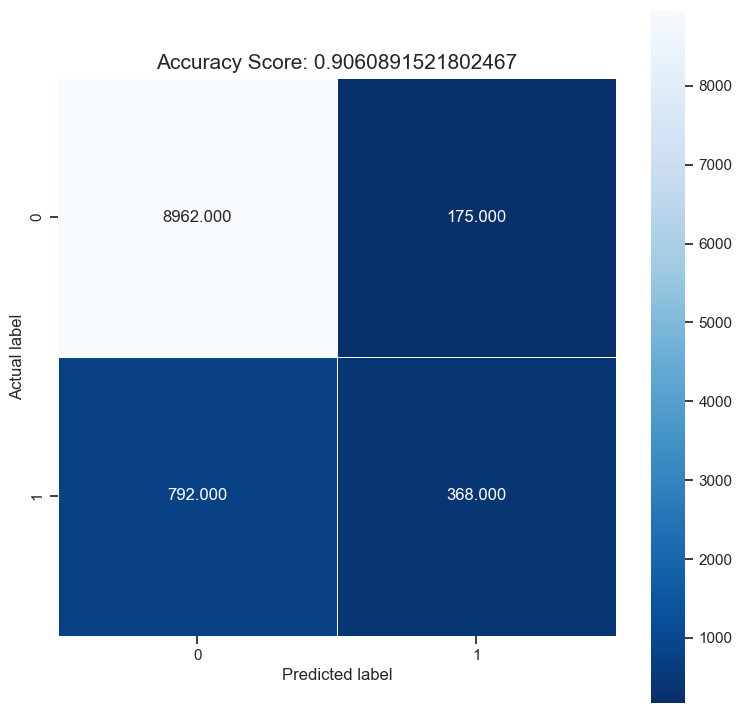

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_accuracy)
plt.title(all_sample_title, size = 15);